<a href="https://colab.research.google.com/github/LKnAtHB/Eastern_Community_Votes/blob/main/Final_BSW_AfD_Gemeinden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import glob
pd.options.display.max_columns = 100

**1. Loading voting data for 2024 and 2019, as well as population data into the data frame for the regions Sachsen, Brandenburg and Thueringen and the last election **

In [ ]:
# LOADING DATA

# data on population and populations density
population_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/population_density.xlsx")

# Zensus 2022 data on demographics, housing, etc.
demografie_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/CSV_Demografie.xlsx")
gebaeude_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/CSV_Gebaeude.xlsx")
wohnungen_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/CSV_Wohnungen.xlsx")
haushalte_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/CVS_Haushalte.xlsx")

# Zensus 2022 Data on Education and Occupation PROBLEM: Missing values at Gemeindelevel --> Spread Landkreis share-value
schulabschluss_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/BildungErwerb/CSV_HoechsterSchulabschluss.xlsx")
erwerbsstatus_data  = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/BildungErwerb/CSV_Erwerbsstatus.xlsx")
beruflichestellung_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/BildungErwerb/CSV_ET_StellungImBeruf.xlsx")
ISCO_08_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/BildungErwerb/CSV_ISCO08.xlsx")
wirtschaftszweig_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/BildungErwerb/CSV_ET_Wirtschaftszweig.xlsx")
alter_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/BildungErwerb/CSV_ET_Alter.xlsx")

# saving the regional identification numbers as string values
# Assign 'AGS' column for all datasets
demografie_data['AGS'] = demografie_data['_RS'].astype(str)
demografie_data = demografie_data.drop(columns=['_RS'])

gebaeude_data['AGS'] = gebaeude_data['_RS'].astype(str)
gebaeude_data = gebaeude_data.drop(columns=['_RS'])

wohnungen_data['AGS'] = wohnungen_data['_RS'].astype(str)
wohnungen_data = wohnungen_data.drop(columns=['_RS'])

haushalte_data['AGS'] = haushalte_data['_RS'].astype(str)
haushalte_data = haushalte_data.drop(columns=['_RS'])

schulabschluss_data['AGS'] = schulabschluss_data['_RS'].astype(str)
schulabschluss_data = schulabschluss_data.drop(columns=['_RS'])

erwerbsstatus_data['AGS'] = erwerbsstatus_data['_RS'].astype(str)
erwerbsstatus_data = erwerbsstatus_data.drop(columns=['_RS'])

beruflichestellung_data['AGS'] = beruflichestellung_data['_RS'].astype(str)
beruflichestellung_data = beruflichestellung_data.drop(columns=['_RS'])

ISCO_08_data['AGS'] = ISCO_08_data['_RS'].astype(str)
ISCO_08_data = ISCO_08_data.drop(columns=['_RS'])

wirtschaftszweig_data['AGS'] = wirtschaftszweig_data['_RS'].astype(str)
wirtschaftszweig_data = wirtschaftszweig_data.drop(columns=['_RS'])

alter_data['AGS'] = alter_data['_RS'].astype(str)
alter_data = alter_data.drop(columns=['_RS'])

population_data['AGS'] = population_data['AGS'].astype(str)

In [ ]:
# Brandenburg Voting data 2019

voting_data2019 = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/Brandenburg_Wahl2019_G.xlsx")

# renaming relevant columns
voting_data2019.rename(columns={'Unnamed: 3': 'Ortname'}, inplace=True)
voting_data2019 = voting_data2019.rename(columns={voting_data2019.columns[1]: 'AGS'})
voting_data2019 = voting_data2019.rename(columns={voting_data2019.columns[2]: 'Regionalebene'})
voting_data2019 = voting_data2019.rename(columns={voting_data2019.columns[9]: 'Wahlbeteiligung_2019'})

# building new df with relevant columns
keep_columns = ['AGS','Regionalebene', 'Ortname', 'Wahlbeteiligung_2019', 'SPD', 'CDU', 'DIE LINKE', 'AfD', 'GRÜNE/B 90', 'BVB / FREIE WÄHLER','PIRATEN','FDP', 'ÖDP', 'Tierschutzpartei', 'V-Partei³']
voting_data2019 = voting_data2019[keep_columns]

# Filter Brandenburg voting data 2019 df for Gemeindeebene
# voting_data2019 = voting_data2019[voting_data2019['Regionalebene'].str.contains(r'\bGemeinde\b', case=False, na=False)]
voting_data2019 = voting_data2019[voting_data2019['Regionalebene'].str.contains(r'\b(Gemeinde|kreisefreie Stadt)\b', case=False, na=False)]


# changes to match the data format to the other df's
voting_data2019['AGS'] = voting_data2019['AGS'].str.replace(' ', '', regex=False)
voting_data2019 = voting_data2019.drop(columns=['Regionalebene'])
voting_data2019 = voting_data2019.rename(columns={'GRÜNE/B 90': 'GRÜNE'})
voting_data2019 = voting_data2019.rename(columns={'BVB / FREIE WÄHLER': 'FREIE WÄHLER'})

# marking the columns as data from 2019
party_columns =['SPD', 'CDU', 'DIE LINKE', 'AfD', 'GRÜNE', 'FREIE WÄHLER','PIRATEN','FDP', 'ÖDP', 'Tierschutzpartei', 'V-Partei³']
voting_data2019.rename(columns={col: f"{col}_2019" for col in party_columns}, inplace=True)

# Brandenburg Voting data 2024
voting_data2024 = pd.read_csv("/content/drive/My Drive/Ost_Wahlen/Brandenburg_Wahlergebnis.csv", sep=';')

# renaming and dropping columns in the 2024 file

# changing decimal numbers to be separated by a . not a ,
voting_data2024['Wahlbeteiligung'] = voting_data2024['Wahlbeteiligung'].str.replace(',', '.').astype(float)

# rename columns to match the other df's
voting_data2024.rename(columns={'Wahlbeteiligung': 'Wahlbeteiligung_2024'}, inplace=True)
voting_data2024.rename(columns={'Gebietsname': 'Ortname'}, inplace=True)
voting_data2024.rename(columns={'Adresse': 'AGS'}, inplace=True)
voting_data2024 = voting_data2024.drop(columns=['Wahlberechtigte', 'Wähler'])

# delete the "SI" in front of the AGS number
voting_data2024 ['AGS'] = voting_data2024 ['AGS'].str.replace('SI', '', regex=False)

# building new df with relevant columns for the voting 2024 data
party_columns =['AfD_2','BSW_2']
voting_data2024['AGS'] = voting_data2024['AGS'].astype(str)
keep_columns = ['Ortname','AGS','Wahlbeteiligung_2024']
voting_data2024 = voting_data2024[keep_columns + party_columns]

# merging voting data for both elections
voting_data = pd.merge(voting_data2024, voting_data2019, on=['Ortname'] , how="left")
voting_data = voting_data.drop(columns=['AGS_y'])
voting_data = voting_data.rename(columns={'AGS_x': 'AGS'})

population_data['AGS'] = population_data['AGS'].astype(str)
brandenburgfile = pd.merge(voting_data, population_data, on="AGS", how="left")
brandenburgfile = brandenburgfile.drop(columns=['Ortname_y'])
brandenburgfile = brandenburgfile.rename(columns={'Ortname_x': 'Ortname'})

# calculate the share of votes from total population
columns_to_exclude = ['Ortname','AGS','Personen','Fläche in qkm', 'Bevölkerungsdichte','Wahlbeteiligung_2019','Wahlbeteiligung_2024'] # exclude the data on vote participation 2019 to calculate separaetly
columns_to_calculate = [col for col in brandenburgfile.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
     brandenburgfile[col] = pd.to_numeric(brandenburgfile[col], errors='coerce')

for col in columns_to_calculate:
     brandenburgfile[col] = brandenburgfile[col] / brandenburgfile['Personen']

# Wahlbeteiligung as a decimal number
brandenburgfile['Wahlbeteiligung_2019'] = (brandenburgfile['Wahlbeteiligung_2019'] / 100)
brandenburgfile['Wahlbeteiligung_2024'] = (brandenburgfile['Wahlbeteiligung_2024'] / 100)

brandenburgfile

<ipython-input-96-32de60120ab5>:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  voting_data2019 = voting_data2019[voting_data2019['Regionalebene'].str.contains(r'\b(Gemeinde|kreisefreie Stadt)\b', case=False, na=False)]


,Ortname,AGS,Wahlbeteiligung_2024,AfD_2,BSW_2,Wahlbeteiligung_2019,SPD_2019,CDU_2019,DIE LINKE_2019,AfD_2019,GRÜNE_2019,FREIE WÄHLER_2019,PIRATEN_2019,FDP_2019,ÖDP_2019,Tierschutzpartei_2019,V-Partei³_2019,Personen,Fläche in qkm,Bevölkerungsdichte
0,"Brandenburg an der Havel, Stadt",120510000000,0.654,0.136121,0.074097,0.526,0.108087,0.073118,0.042569,0.090535,0.049924,0.023494,0.002706,0.015159,0.002787,0.011135,0.000979,73552,229.72,320
1,"Cottbus, Stadt",120520000000,0.711,0.180206,0.080638,0.616,0.127409,0.079499,0.056151,0.138439,0.042597,0.020814,0.004450,0.029097,0.002896,0.012776,0.001544,93926,165.62,567
2,"Frankfurt (Oder), Stadt",120530000000,0.684,0.152182,0.084633,0.557,0.104457,0.067048,0.078527,0.109919,0.040651,0.014899,0.002955,0.017066,0.002006,0.009993,0.001110,55841,147.85,378
3,"Potsdam, Stadt",120540000000,0.788,0.092141,0.068740,0.693,0.134782,0.062120,0.074095,0.070578,0.114980,0.011985,0.004513,0.023714,0.005284,0.013074,0.002281,182806,188.24,971
4,Ahrensfelde,120600005005,0.785,0.202605,0.113649,0.632,0.118915,0.088244,0.067677,0.122972,0.045759,0.039638,0.002491,0.014731,0.001566,0.012383,0.000569,14052,57.93,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,Grünow,120735306261,0.633,0.224339,0.078307,0.555,0.104762,0.094180,0.046561,0.121693,0.025397,0.031746,0.005291,0.007407,0.000000,0.013757,0.000000,945,34.92,27
411,Oberuckersee,120735306430,0.566,0.197425,0.087676,0.521,0.115267,0.070509,0.055181,0.119559,0.033109,0.028204,0.001226,0.019620,0.001839,0.009197,0.000000,1631,84.96,19
412,Randowtal,120735306458,0.614,0.215148,0.063666,0.553,0.079034,0.087816,0.045005,0.180022,0.026345,0.010977,0.007684,0.012075,0.000000,0.009879,0.000000,911,64.19,14
413,Uckerfelde,120735306578,0.628,0.189000,0.050000,0.59,0.099000,0.118000,0.024000,0.158000,0.020000,0.027000,0.001000,0.010000,0.000000,0.011000,0.002000,1000,46.27,22


In [ ]:
# PUT SACHSEN VOTING DATA INTO ONE TABLE

# Sachsen votes for 2019 and 2024
voting_data24 = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/Sachsen_Wahl.xlsx")
voting_data19 = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/Sachsen_Wahl2019.xlsx")

# Only keeping the "Zweitstimme" for the 2019 data, marking it as 2019 data & only AfD and BSW votes for the 2024 data
voting_data24['AGS'] = voting_data24['AGS'].astype(str)
voting_data19 = voting_data19.rename(columns=lambda col: col.replace('_2', '_2019'))
columns_to_keep = [col for col in voting_data19.columns if '_2019' in col]
voting_data19 = voting_data19.rename(columns={'E_WAEHLER': 'Wähler_2019', 'E_WB': 'Wahlberechtigte_2019'})
extra_column = ['Ortname','Wähler_2019', 'Wahlberechtigte_2019']
columns_to_keep.extend(extra_column)
voting_data19 = voting_data19[columns_to_keep]

voting_data24 = pd.merge(voting_data24, population_data, on="Ortname", how="left")

# only keep column AGS_y renaming it to simply AGS to make this consistent across df's, and keeping only relevant columns
party_columns =['AfD_2','BSW_2']
voting_data24.rename(columns={'AGS_y': 'AGS'}, inplace=True)
voting_data24['AGS'] = voting_data24['AGS'].astype(str)
keep_columns = ['Ortname','AGS','Personen','Fläche in qkm', 'Bevölkerungsdichte', 'Wahlberechtigte', 'Wähler']
voting_data24 = voting_data24[keep_columns + party_columns]


# Merge the voting and population datasets on AGS number

sachsenfile = pd.merge(voting_data24, voting_data19, on="Ortname", how="left") # not sure if this will result in some mismatches, but matching on AGS does not work, as the numbers are shorter in the 2019 data for some reason


sachsenfile = sachsenfile.drop(columns=['ORTNR_2019024'])

# calculate the share of votes from total population
columns_to_exclude = ['Ortname','AGS','Personen','Fläche in qkm', 'Bevölkerungsdichte','Wähler_2019','Wahlberechtigte_2019'] # exclude the data on vote participation 2019 to calculate separaetly
columns_to_calculate = [col for col in sachsenfile.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
     sachsenfile[col] = pd.to_numeric(sachsenfile[col], errors='coerce')

for col in columns_to_calculate:
     sachsenfile[col] = sachsenfile[col] / sachsenfile['Personen']

# calculating the percentage of votes from possible voters in 2019
sachsenfile['Wahlbeteiligung_2019'] = (sachsenfile['Wähler_2019'] / sachsenfile['Wahlberechtigte_2019'])
sachsenfile['Wahlbeteiligung_2024'] = (sachsenfile['Wähler'] / sachsenfile['Wahlberechtigte'])

sachsenfile = sachsenfile.drop(columns=['Wähler_2019','Wahlberechtigte_2019','Wähler','Wahlberechtigte'])
sachsenfile['AGS'] = sachsenfile['AGS'].astype(str).str.rstrip('.0')

# filter sachsenfile for AGS that have 10 digits or fewer

sachsenfile = sachsenfile[sachsenfile['AGS'].astype(str).apply(len) > 10]

sachsenfile

,Ortname,AGS,Personen,Fläche in qkm,Bevölkerungsdichte,AfD_2,BSW_2,CDU_2019,DIE LINKE_2019,SPD_2019,AfD_2019,GRÜNE_2019,NPD_2019,FDP_2019,FREIE WÄHLER_2019,Tierschutzpartei_2019,PIRATEN_2019,Die PARTEI_2019,BüSo_2019,ADPM_2019,Blaue #TeamPetry_2019,KPD_2019,ÖDP_2019,Die Humanisten_2019,PDV_2019,Gesundheitsforschung_2019,Wahlbeteiligung_2019,Wahlbeteiligung_2024
0,"Pausa-Mühltroff, Stadt",14523031031,4751.0,64.13,74.0,0.209430,0.081246,0.236161,0.049253,0.039781,0.146916,0.026942,0.001684,0.025468,0.030099,0.006314,0.001052,0.006314,0.000210,0.000842,0.002105,0.000210,0.000842,0.000421,0.000421,0.003368,0.675566,0.776569
1,"Plauen, Stadt",14523032032,64674.0,102.11,633.0,0.163976,0.077404,0.154111,0.054566,0.042011,0.138897,0.034295,0.003232,0.019869,0.011117,0.010731,0.001051,0.008040,0.000216,0.001577,0.001639,0.000588,0.001191,0.000866,0.000526,0.002613,0.612211,0.685015
2,Rosenbach/Vogtl.,145230365365,4009.0,67.34,60.0,0.243702,0.087054,0.206286,0.054378,0.046396,0.184335,0.036418,0.003492,0.028935,0.018957,0.007733,0.000998,0.003742,0.000249,0.000998,0.003991,0.000249,0.001247,0.000000,0.001497,0.004490,0.695392,0.794479
3,Weischlitz,14523045045,5718.0,121.63,47.0,0.207240,0.093914,0.220707,0.056139,0.043722,0.149528,0.033228,0.003847,0.023610,0.024309,0.009444,0.001399,0.004547,0.000525,0.001224,0.002274,0.000525,0.002448,0.001224,0.000350,0.004022,0.689336,0.788588
4,"Adorf/Vogtl., Stadt",14523001001,4686.0,42.97,109.0,0.195903,0.073410,0.193982,0.042254,0.048869,0.137644,0.023047,0.005122,0.016432,0.021554,0.007042,0.000640,0.003628,0.000000,0.000000,0.001067,0.000640,0.000640,0.000427,0.000213,0.003414,0.584248,0.696743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Mittelherwigsdorf,14626031031,3506.0,36.45,96.0,0.243012,0.065887,0.266686,0.038791,0.023388,0.202225,0.034227,0.003423,0.020251,0.027096,0.011124,0.001711,0.007986,0.000570,0.000856,0.001426,0.000570,0.001711,0.000285,0.000856,0.004278,0.749755,0.802115
430,Oderwitz,14626039039,4764.0,35.91,133.0,0.241604,0.072208,0.231738,0.045130,0.030017,0.198363,0.023090,0.003359,0.025189,0.015533,0.009236,0.001259,0.006297,0.000210,0.000630,0.002939,0.000210,0.000840,0.000420,0.000420,0.001050,0.662072,0.755311
432,Oybin,14626522743,1309.0,18.28,72.0,0.178762,0.051184,0.276547,0.048892,0.039725,0.197097,0.034377,0.002292,0.029794,0.016043,0.007639,0.000000,0.006875,0.000000,0.000000,0.003056,0.001528,0.001528,0.001528,0.000000,0.003056,0.748513,0.564620
433,"Seifhennersdorf, Stadt",14626053053,3606.0,19.12,189.0,0.223239,0.060732,0.175263,0.055463,0.034942,0.197449,0.028841,0.005269,0.016639,0.010261,0.008042,0.001109,0.007488,0.000000,0.000832,0.001941,0.000555,0.001664,0.000832,0.000832,0.001941,0.644788,0.712168


In [ ]:
# PUT THUERINGEN VOTING DATA INTO ONE TABLE

# Step 1: Load the data from Excel files
voting_data24 = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/Thueringen_Wahl.xlsx")
population_data = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/population_density.xlsx")

# THÜRINGEN 2024
# Step 1.b: Take care of splitted head rows in Thueringen voting data Excel (Haluka's Code)

first_column_list=voting_data24.iloc[0,:].tolist()
second_column_list=voting_data24.iloc[1,:].tolist()

third_column_list=voting_data24.iloc[2,:].tolist()

column_list_general=[]

for i in range(len(first_column_list)):

    column_name=str(first_column_list[i])+str(second_column_list[i])+str(third_column_list[i])

    column_list_general.append(column_name)

column_list_general

voting_data24.columns=column_list_general

# Naming column "Ortname" in data frame for merging
# voting_data.rename(columns={'nannannan': 'Ortname'}, inplace=True) # there were several columns with that name --> diverted to renaming with an index
voting_data24.columns.values[6] = 'Ortname'

# Merge the datasets on the common column "Ortname"
# Then merge votes from 2024 and population data
thueringenfile = pd.merge(voting_data24, population_data, on="Ortname", how="inner")

# function to rename columns for absolut voting data to match "Party_1" and "Party_2" pattern
def rename_column(col_name):
    if 'Wahlkreisstimmen' in col_name:
        # replace 'WahlkreisstimmenPartyabsolut' with 'Party_1'
        party_name = col_name.replace('Wahlkreisstimmen', '').replace('absolut', '')
        return f'{party_name}_1'
    elif 'Landesstimmen' in col_name:
        # replace 'LandesstimmenPartyabsolut' with 'Party_2'
        party_name = col_name.replace('Landesstimmen', '').replace('absolut', '')
        return f'{party_name}_2'
    else:
        return col_name  # keep column names that don't match unchanged

thueringenfile.rename(columns=lambda col: rename_column(col), inplace=True)

# we want to use the absolut numbers. to make the df easier to work with, I am going to delete all columns with a % in the headline
thueringenfile = thueringenfile.drop(columns=thueringenfile.filter(like='%').columns)

# renaming relevant columns to match sachsenfile
thueringenfile.rename(columns={'kreis-nr.nan': 'Wahlkreisnummer'}, inplace=True)
thueringenfile.rename(columns={'berechtigteinsgesamtnan': 'Wahlberechtigte'}, inplace=True)
thueringenfile.rename(columns={'beteiligungnannan': 'Wahlbeteiligung_2024'}, inplace=True)
thueringenfile.rename(columns={'ungültigenannan': 'ungültige_1'}, inplace=True)
thueringenfile.rename(columns={'gültigenannan': 'gültige_1'}, inplace=True)
thueringenfile.rename(columns={'ungültigenannan.1': 'ungültige_2'}, inplace=True)
thueringenfile.rename(columns={'gültigenannan.1': 'gültige_2'}, inplace=True)


# Convert the "Wahlbeteiligung" column to numeric values
thueringenfile['Wahlbeteiligung_2024'] = pd.to_numeric(thueringenfile['Wahlbeteiligung_2024'], errors='coerce')


# Create a copy of the column names to work on
columns = pd.Series(thueringenfile.columns)

# Find duplicate column names and number them accordingly
for dup in columns[columns.duplicated()].unique():
    # Find indices of duplicated columns
    dup_indices = columns[columns == dup].index
    # Rename the columns with a numbering scheme
    for i, idx in enumerate(dup_indices, 1):
        columns[idx] = f"{dup}_{i}"

# Assign the new column names back to the DataFrame
thueringenfile.columns = columns

# Rename the second column
thueringenfile = thueringenfile.rename(columns={thueringenfile.columns[1]: 'Satzart'})

#filter for G for "Gemeinde" to get only the Gemeinde data
thueringenfile = thueringenfile[thueringenfile['Satzart'] == 'G']

# make new cleaned-up table
party_columns = ['AfD_2','BSW_2']
keep_columns =  ['Ortname','AGS','Personen','Fläche in qkm', 'Bevölkerungsdichte', 'Wahlbeteiligung_2024']
thueringenfile = thueringenfile[keep_columns + party_columns]

# columns_to_drop = ['mitWahlscheinnan_2','ungültige_1_2','gültige_1_2']

# Drop the specified columns
# thueringenfile = thueringenfile.drop(columns=columns_to_drop)

# create new column containing the last three digits (Gemeindenummer)
thueringenfile['AGS_xxx'] = thueringenfile['AGS'].astype(str).str[-3:]

voting_data24 = thueringenfile

# adding THÜRINGEN 2019 data

voting_data19 = pd.read_excel("/content/drive/My Drive/Ost_Wahlen/Thueringen_Wahl2019.xlsx")
# Take care of splitted head rows in Thueringen voting 2019 data Excel (Haluka's Code)

first_column_list=voting_data19.iloc[0,:].tolist()
second_column_list=voting_data19.iloc[1,:].tolist()

third_column_list=voting_data19.iloc[2,:].tolist()

column_list_general=[]

for i in range(len(first_column_list)):

    column_name=str(first_column_list[i])+str(second_column_list[i])+str(third_column_list[i])

    column_list_general.append(column_name)

column_list_general

voting_data19.columns=column_list_general


# function to rename columns for absolut voting data to match "Party_1" and "Party_2" pattern
def rename_column(col_name):
    if 'Wahlkreisstimmen' in col_name:
        # replace 'WahlkreisstimmenPartyabsolut' with 'Party_1'
        party_name = col_name.replace('Wahlkreisstimmen', '').replace('absolut', '')
        return f'{party_name}_1'
    elif 'Landesstimmen' in col_name:
        # replace 'LandesstimmenPartyabsolut' with 'Party_2'
        party_name = col_name.replace('Landesstimmen', '').replace('absolut', '')
        return f'{party_name}_2'
    else:
        return col_name  # keep column names that don't match unchanged

voting_data19.rename(columns=lambda col: rename_column(col), inplace=True)

# some code do solve the annoying problem of the linked first columns

# Create a copy of the column names to work on
columns = pd.Series(voting_data19.columns)

# Find duplicate column names and number them accordingly
for dup in columns[columns.duplicated()].unique():
    # Find indices of duplicated columns
    dup_indices = columns[columns == dup].index
    # Rename the columns with a numbering scheme
    for i, idx in enumerate(dup_indices, 1):
        columns[idx] = f"{dup}_{i}"

# Assign the new column names back to the DataFrame
voting_data19.columns = columns

# delete unnecessary columns
voting_data19 = voting_data19.drop(columns=voting_data19.filter(like='%').columns)
voting_data19 = voting_data19.rename(columns={voting_data19.columns[1]: 'Satzart'})
voting_data19 = voting_data19[voting_data19['Satzart'] == 'G']

# renaming relevant columns to match sachsenfile
voting_data19.rename(columns={'nannannan_3': 'Ortname'}, inplace=True)
voting_data19.rename(columns={'beteiligungnannan': 'Wahlbeteiligung_2019'}, inplace=True)


# make new cleaned-up table
party_columns = [col for col in voting_data19.columns if '_2' in col]
keep_columns = ['Ortname']
voting_data19 = voting_data19[keep_columns + party_columns]

columns_to_drop = ['Einzelbewerber_1_2','mitWahlscheinnan_2','ungültigenannan_2','gültigenannan_2']

# drop columns
voting_data19 = voting_data19.drop(columns=columns_to_drop)

# Function to rename all column names ending with "_2" to "_2019"
def rename_column19(col_name):
    if col_name.endswith('_2'):
        # Replace "_2" with "_2019"
        return col_name.replace('_2', '_2019')
    else:
        return col_name  # Keep other column names unchanged

#  renaming  all columns in the DataFrame
voting_data19.columns = [rename_column19(col) for col in voting_data19.columns]

# merge the votingdata for both 2019 and 2024
# dropping the municipals that are not in the 2024 data (which unfortunately is a lot 546 vs. 687)

thueringenfile = pd.merge(voting_data24, voting_data19, on="Ortname", how="left")

thueringenfile = thueringenfile.drop(columns=['AGS_xxx'])

# calculate the share of votes from total population
columns_to_exclude = ['Ortname','AGS','Personen','Fläche in qkm', 'Bevölkerungsdichte','Wahlbeteiligung_2024','Wahlbeteiligung_2019'] # exclude the data on vote participation 2019 to calculate separaetly
columns_to_calculate = [col for col in thueringenfile.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
     thueringenfile[col] = pd.to_numeric(thueringenfile[col], errors='coerce')

for col in columns_to_calculate:
     thueringenfile[col] = thueringenfile[col] / thueringenfile['Personen']


# Wahlbeteiligung as a decimal number
thueringenfile['Wahlbeteiligung_2019'] = (thueringenfile['Wahlbeteiligung_2019'] / 100)
thueringenfile['Wahlbeteiligung_2024'] = (thueringenfile['Wahlbeteiligung_2024'] / 100)

thueringenfile

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Ortname,AGS,Personen,Fläche in qkm,Bevölkerungsdichte,Wahlbeteiligung_2024,AfD_2,BSW_2,Wahlbeteiligung_2019,CDU_2019,DIE LINKE_2019,SPD_2019,AfD_2019,GRÜNE_2019,NPD_2019,FDP_2019,PIRATEN_2019,Die PARTEI_2019,KPD_2019,TIERSCHUTZ hier!_2019,BGE_2019,DIE DIREKTE!_2019,Blaue #TeamPetry Thüringen_2019,Graue Panther_2019,MLPD_2019,ÖDP / Familie .._2019,Gesundheitsforschung_2019
0,Arenshausen,160615008001,995,5.79,172,0.545,0.162814,0.037186,0.588,0.159799,0.087437,0.032161,0.117588,0.021106,0.005025,0.018090,NaN,0.006030,NaN,0.004020,NaN,0.003015,NaN,0.002010,NaN,NaN,0.001005
1,Asbach-Sickenberg,160615012002,101,9.91,10,0.700,0.188119,0.089109,0.63,0.108911,0.188119,0.059406,0.059406,0.029703,NaN,0.029703,0.009901,NaN,NaN,0.019802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Berlingerode,160615001003,1199,11.74,102,0.523,0.165138,0.025021,0.49,0.171810,0.055046,0.028357,0.101751,0.011676,0.000834,0.016681,NaN,0.000834,NaN,0.005004,NaN,0.001668,NaN,NaN,NaN,0.003336,0.001668
3,Bodenrode-Westhausen,160615009012,1080,14.63,74,0.657,0.183333,0.057407,0.666,0.228704,0.073148,0.025926,0.132407,0.025926,0.002778,0.041667,0.001852,0.004630,0.000926,NaN,NaN,NaN,NaN,0.002778,NaN,0.005556,0.000926
4,Bornhagen,160615008014,238,6.57,36,0.709,0.281513,0.063025,0.7,0.159664,0.063025,0.063025,0.210084,0.016807,0.004202,0.012605,NaN,0.016807,NaN,0.012605,NaN,0.004202,NaN,NaN,0.008403,0.008403,0.004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Göpfersdorf,160775051011,215,5.93,36,0.696,0.167442,0.069767,0.658,0.204651,0.167442,0.041860,0.097674,0.013953,NaN,0.027907,0.004651,NaN,NaN,0.009302,NaN,NaN,NaN,0.004651,NaN,NaN,NaN
542,Langenleuba-Niederhain,160775051023,1722,39.43,44,0.645,0.229965,0.072009,0.588,0.113821,0.139373,0.040070,0.138792,0.019164,0.001161,0.019164,0.001161,0.005807,0.001161,0.005807,NaN,0.002323,0.000581,0.002904,0.000581,0.004646,0.002904
543,Nobitz,160775051036,7023,100.37,70,0.577,0.222554,0.067920,0.552,0.119749,0.131425,0.029190,0.138830,0.013385,0.000997,0.018653,0.001139,0.004841,0.000712,0.004129,0.000997,0.001139,NaN,0.002563,0.000854,0.001709,0.003560
544,Treben,160775004048,1180,10.00,118,0.494,0.183051,0.047458,0.429,0.107627,0.094068,0.019492,0.100000,0.009322,NaN,0.013559,0.003390,0.004237,NaN,0.005085,0.001695,0.000847,NaN,0.000847,NaN,0.000847,0.001695


In [ ]:
# COMBINING THE VOTING DATA FOR SACHSEN; THUERINGEN AND BRANDENBURG IN ONE DF

ostfile = pd.concat([sachsenfile, thueringenfile, brandenburgfile], ignore_index=True)
ostfile


,Ortname,AGS,Personen,Fläche in qkm,Bevölkerungsdichte,AfD_2,BSW_2,CDU_2019,DIE LINKE_2019,SPD_2019,AfD_2019,GRÜNE_2019,NPD_2019,FDP_2019,FREIE WÄHLER_2019,Tierschutzpartei_2019,PIRATEN_2019,Die PARTEI_2019,BüSo_2019,ADPM_2019,Blaue #TeamPetry_2019,KPD_2019,ÖDP_2019,Die Humanisten_2019,PDV_2019,Gesundheitsforschung_2019,Wahlbeteiligung_2019,Wahlbeteiligung_2024,TIERSCHUTZ hier!_2019,BGE_2019,DIE DIREKTE!_2019,Blaue #TeamPetry Thüringen_2019,Graue Panther_2019,MLPD_2019,ÖDP / Familie .._2019,V-Partei³_2019
0,"Pausa-Mühltroff, Stadt",14523031031,4751.0,64.13,74.0,0.209430,0.081246,0.236161,0.049253,0.039781,0.146916,0.026942,0.001684,0.025468,0.030099,0.006314,0.001052,0.006314,0.000210,0.000842,0.002105,0.000210,0.000842,0.000421,0.000421,0.003368,0.675566,0.776569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Plauen, Stadt",14523032032,64674.0,102.11,633.0,0.163976,0.077404,0.154111,0.054566,0.042011,0.138897,0.034295,0.003232,0.019869,0.011117,0.010731,0.001051,0.008040,0.000216,0.001577,0.001639,0.000588,0.001191,0.000866,0.000526,0.002613,0.612211,0.685015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rosenbach/Vogtl.,145230365365,4009.0,67.34,60.0,0.243702,0.087054,0.206286,0.054378,0.046396,0.184335,0.036418,0.003492,0.028935,0.018957,0.007733,0.000998,0.003742,0.000249,0.000998,0.003991,0.000249,0.001247,0.000000,0.001497,0.004490,0.695392,0.794479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Weischlitz,14523045045,5718.0,121.63,47.0,0.207240,0.093914,0.220707,0.056139,0.043722,0.149528,0.033228,0.003847,0.023610,0.024309,0.009444,0.001399,0.004547,0.000525,0.001224,0.002274,0.000525,0.002448,0.001224,0.000350,0.004022,0.689336,0.788588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Adorf/Vogtl., Stadt",14523001001,4686.0,42.97,109.0,0.195903,0.073410,0.193982,0.042254,0.048869,0.137644,0.023047,0.005122,0.016432,0.021554,0.007042,0.000640,0.003628,0.000000,0.000000,0.001067,0.000640,0.000640,0.000427,0.000213,0.003414,0.584248,0.696743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Grünow,120735306261,945.0,34.92,27.0,0.224339,0.078307,0.094180,0.046561,0.104762,0.121693,0.025397,NaN,0.007407,0.031746,0.013757,0.005291,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.555,0.633000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1319,Oberuckersee,120735306430,1631.0,84.96,19.0,0.197425,0.087676,0.070509,0.055181,0.115267,0.119559,0.033109,NaN,0.019620,0.028204,0.009197,0.001226,NaN,NaN,NaN,NaN,NaN,0.001839,NaN,NaN,NaN,0.521,0.566000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1320,Randowtal,120735306458,911.0,64.19,14.0,0.215148,0.063666,0.087816,0.045005,0.079034,0.180022,0.026345,NaN,0.012075,0.010977,0.009879,0.007684,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.553,0.614000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1321,Uckerfelde,120735306578,1000.0,46.27,22.0,0.189000,0.050000,0.118000,0.024000,0.099000,0.158000,0.020000,NaN,0.010000,0.027000,0.011000,0.001000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.59,0.628000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002


In [ ]:
# AGS seem to have different lengths...

# Create a new column to store the length of AGS
ostfile['AGS_length'] = ostfile['AGS'].astype(str).apply(len)

# Get the unique lengths of the AGS
unique_lengths = ostfile['AGS_length'].unique()

# Print the unique lengths
print(f"Unique lengths of AGSs: {unique_lengths}")

# Optionally, you can also count how many IDs have each length
length_counts = ostfile['AGS_length'].value_counts()
print(f"Count of AGSs by length:\n{length_counts}")

Unique lengths of AGSs: [11 12]
Count of AGSs by length:
AGS_length
12    973
11    350
Name: count, dtype: int64


In [ ]:
# GET ZENSUS DATA FOR ALL THREE STATES AND PUT THEM INTO ONE TABLE

import numpy as np

# DATE ON DEMOGRAPHICS AND HOUSING

# a) Filter Zensus data column "Regionalebene" for "Gemeinde" and relevant state ID's 12, 14, 16
def filter_by_gemeinde(data, column_name):
    return data[data[column_name].str.contains(r'\bGemeinde\b', na=False, regex=True)]

demografie_data = filter_by_gemeinde(demografie_data, 'Regionalebene')
gebaeude_data = filter_by_gemeinde(gebaeude_data, 'Regionalebene')
wohnungen_data = filter_by_gemeinde(wohnungen_data, 'Regionalebene')
haushalte_data = filter_by_gemeinde(haushalte_data, 'Reg_Ebene')

# b) filter Zensus data for Sachsen (AGS start with 12,14,16 and is saved in a column called "AGS")
def filter_by_RS_prefix(data, prefixes):
    return data[data['AGS'].str.startswith(tuple(prefixes))]

ost_demografie = filter_by_RS_prefix(demografie_data, ['12', '14', '16'])
ost_gebaeude = filter_by_RS_prefix(gebaeude_data, ['12', '14', '16'])
ost_wohnungen = filter_by_RS_prefix(wohnungen_data, ['12', '14', '16'])
ost_haushalte = filter_by_RS_prefix(haushalte_data, ['12', '14', '16'])

In [ ]:
# DATA ON OCCUPATION AND EDUCATION (using the "Landkreis" data instead of the "Gemeinde" data)

# c) spreading the share of the Landkreis on education an occupation to the Gemeinde rows (too many NaN otherwise)

# asked ChatGPT to make my code for filling missing data (see below A1) into a function to use for all the other df on occupation and education

def fill_missing_values_in_data(df, population_column, rs_prefix):
    # Replace "/" with NaN to mark missing values
    df = df.replace("/", np.nan)

    # Ensure 'AGS' is a string
    df['AGS'] = df['AGS'].astype(str)

    # Step 1: Filter data based on the prefix (e.g., '14' for Sachsen, '16' for Thueringen)
    df = df[df['AGS'].str.startswith(tuple(rs_prefix))]

    # Step 2: Create two tables, one for the district (5-digit) and one for the municipality values (15-digit)
    df_Landkreis = df[df['AGS'].str.len() == 5].copy()  # District-level (5-digit IDs)
    df_Gemeinde = filter_by_gemeinde(df, 'Regionalebene')  # Municipality-level (15-digit IDs)

    # Step 3: Define columns to exclude from the share calculation (e.g., ID columns, region names)
    columns_to_exclude = ['AGS', 'Name', 'Berichtszeitpunkt', 'Regionalebene', population_column]
    columns_to_calculate = [col for col in df_Landkreis.columns if col not in columns_to_exclude]

    # Step 4: Convert columns to numeric before dividing (for both district and municipality-level data)
    for col in columns_to_calculate:
        # Convert columns to numeric and calculate shares for district-level data
        df_Landkreis[col] = pd.to_numeric(df_Landkreis[col], errors='coerce')
        df_Landkreis[col] = df_Landkreis[col] / df_Landkreis[population_column]

        # Convert columns to numeric and calculate shares for municipality-level data
        df_Gemeinde[col] = pd.to_numeric(df_Gemeinde[col], errors='coerce')
        df_Gemeinde[col] = df_Gemeinde[col] / df_Gemeinde[population_column]

    # Step 5: Create 'Landkreis_ID' for the municipality data (first 5 digits)
    df_Gemeinde['Landkreis_ID'] = df_Gemeinde['AGS'].str[:5]

    # Step 6: Merge the municipality data with the district data based on 'Landkreis_ID'
    df_filled = pd.merge(df_Gemeinde, df_Landkreis, left_on='Landkreis_ID', right_on='AGS', suffixes=('', '_Landkreis'))

    # Step 7: Fill NaNs in the municipality data with the corresponding district-level values
    for col in columns_to_calculate:
        df_filled[col] = df_filled[col].fillna(df_filled[col + '_Landkreis'])

    # Step 8: Drop unnecessary columns after filling NaN values
    df_filled = df_filled.drop(columns=[col for col in df_filled.columns if '_Landkreis' in col or col == 'Landkreis_ID'])

    # Step 9: Drop the population column as the last step
    df_filled = df_filled.drop(columns=[population_column])
    columns_to_drop = ['Regionalebene','Berichtszeitpunkt']
    df_filled = df_filled.drop(columns=columns_to_drop)

    return df_filled


# Now apply the function to each data frame with the appropriate population column and _RS prefix
ost_schulabschluss_filled = fill_missing_values_in_data(schulabschluss_data, 'SCHULABS_STP', rs_prefix=['12', '14', '16'])
ost_erwerbsstatus_filled = fill_missing_values_in_data(erwerbsstatus_data, 'ERWERBSTAT_KURZ_STP', rs_prefix=['12', '14', '16'])
ost_beruflichestellung_filled = fill_missing_values_in_data(beruflichestellung_data, 'ET_STELLGBERF_STP', rs_prefix=['12', '14', '16'])
ost_ISCO_08_filled = fill_missing_values_in_data(ISCO_08_data, 'ET_BERUFSKLSS_HGISCO_STP', rs_prefix=['12', '14', '16'])
ost_wirtschaftszweig_filled = fill_missing_values_in_data(wirtschaftszweig_data, 'ET_WIRTSZWG_STP', rs_prefix=['12', '14', '16'])
ost_alter_filled = fill_missing_values_in_data(alter_data, 'ET_ALTER_ERW', rs_prefix=['12', '14', '16'])



<ipython-input-103-06b9ffffae91>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("/", np.nan)
<ipython-input-103-06b9ffffae91>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Gemeinde[col] = pd.to_numeric(df_Gemeinde[col], errors='coerce')
<ipython-input-103-06b9ffffae91>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
# merge all the tables on occupation and education into one

ost_schulabschluss_filled['AGS'] = ost_schulabschluss_filled['AGS'].astype(str)
ost_erwerbsstatus_filled['AGS'] = ost_erwerbsstatus_filled['AGS'].astype(str)
ost_beruflichestellung_filled['AGS'] = ost_beruflichestellung_filled['AGS'].astype(str)
ost_ISCO_08_filled['AGS'] = ost_ISCO_08_filled['AGS'].astype(str)
ost_wirtschaftszweig_filled['AGS'] = ost_wirtschaftszweig_filled['AGS'].astype(str)
ost_alter_filled['AGS'] = ost_alter_filled['AGS'].astype(str)


def merge_and_drop_duplicates(*dfs):

    # Merge all tables based on 'AGS'
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = merged_df.merge(df, on=["AGS", "Name"], how="outer", suffixes=('', ''))

    return merged_df

ost_full_ed_oc = merge_and_drop_duplicates(
    ost_schulabschluss_filled,
    ost_erwerbsstatus_filled,
    ost_beruflichestellung_filled,
    ost_ISCO_08_filled,
    ost_wirtschaftszweig_filled,
    ost_alter_filled
)

In [ ]:
ost_full_ed_oc

,Name,SCHULABS_STP__M,SCHULABS_STP__W,SCHULABS_STP__1,SCHULABS_STP__1_M,SCHULABS_STP__1_W,SCHULABS_STP__2,SCHULABS_STP__2_M,SCHULABS_STP__2_W,SCHULABS_STP__21,SCHULABS_STP__21_M,SCHULABS_STP__21_W,SCHULABS_STP__22,SCHULABS_STP__22_M,SCHULABS_STP__22_W,SCHULABS_STP__23,SCHULABS_STP__23_M,SCHULABS_STP__23_W,SCHULABS_STP__24,SCHULABS_STP__24_M,SCHULABS_STP__24_W,SCHULABS_STP__3,SCHULABS_STP__3_M,SCHULABS_STP__3_W,AGS,ERWERBSTAT_KURZ_STP__M,ERWERBSTAT_KURZ_STP__W,ERWERBSTAT_KURZ_STP__1,ERWERBSTAT_KURZ_STP__1_M,ERWERBSTAT_KURZ_STP__1_W,ERWERBSTAT_KURZ_STP__11,ERWERBSTAT_KURZ_STP__11_M,ERWERBSTAT_KURZ_STP__11_W,ERWERBSTAT_KURZ_STP__12,ERWERBSTAT_KURZ_STP__12_M,ERWERBSTAT_KURZ_STP__12_W,ERWERBSTAT_KURZ_STP__2,ERWERBSTAT_KURZ_STP__2_M,ERWERBSTAT_KURZ_STP__2_W,ET_STELLGBERF_STP__M,ET_STELLGBERF_STP__W,ET_STELLGBERF_STP__1,ET_STELLGBERF_STP__1_M,ET_STELLGBERF_STP__1_W,ET_STELLGBERF_STP__2,ET_STELLGBERF_STP__2_M,ET_STELLGBERF_STP__2_W,ET_STELLGBERF_STP__3,ET_STELLGBERF_STP__3_M,ET_STELLGBERF_STP__3_W,...,ET_WIRTSZWG_STP__22,ET_WIRTSZWG_STP__22_M,ET_WIRTSZWG_STP__22_W,ET_WIRTSZWG_STP__23,ET_WIRTSZWG_STP__23_M,ET_WIRTSZWG_STP__23_W,ET_WIRTSZWG_STP__3,ET_WIRTSZWG_STP__3_M,ET_WIRTSZWG_STP__3_W,ET_WIRTSZWG_STP__31,ET_WIRTSZWG_STP__31_M,ET_WIRTSZWG_STP__31_W,ET_WIRTSZWG_STP__32,ET_WIRTSZWG_STP__32_M,ET_WIRTSZWG_STP__32_W,ET_WIRTSZWG_STP__33,ET_WIRTSZWG_STP__33_M,ET_WIRTSZWG_STP__33_W,ET_WIRTSZWG_STP__34,ET_WIRTSZWG_STP__34_M,ET_WIRTSZWG_STP__34_W,ET_WIRTSZWG_STP__35,ET_WIRTSZWG_STP__35_M,ET_WIRTSZWG_STP__35_W,ET_WIRTSZWG_STP__36,ET_WIRTSZWG_STP__36_M,ET_WIRTSZWG_STP__36_W,ET_ALTER_ERW__M,ET_ALTER_ERW__W,ET_ALTER_ERW__1,ET_ALTER_ERW__1_M,ET_ALTER_ERW__1_W,ET_ALTER_ERW__2,ET_ALTER_ERW__2_M,ET_ALTER_ERW__2_W,ET_ALTER_ERW__3,ET_ALTER_ERW__3_M,ET_ALTER_ERW__3_W,ET_ALTER_ERW__4,ET_ALTER_ERW__4_M,ET_ALTER_ERW__4_W,ET_ALTER_ERW__5,ET_ALTER_ERW__5_M,ET_ALTER_ERW__5_W,ET_ALTER_ERW__6,ET_ALTER_ERW__6_M,ET_ALTER_ERW__6_W,ET_ALTER_ERW__7,ET_ALTER_ERW__7_M,ET_ALTER_ERW__7_W
0,"Brandenburg an der Havel, Stadt",0.486073,0.513927,0.021339,0.012380,0.008959,0.899821,0.433458,0.466363,0.141554,0.065646,0.075908,0.294836,0.138296,0.156377,0.165173,0.087311,0.077863,0.298257,0.142206,0.156214,0.078677,0.040235,0.038606,120510000000,0.487733,0.512267,0.490976,0.260857,0.230259,0.449239,0.238297,0.211083,0.041737,0.022561,0.019177,0.508883,0.226875,0.282008,0.530446,0.469868,0.881042,0.461394,0.419335,0.043315,0.020088,0.023227,0.045512,0.030446,0.014752,...,0.021343,0.013497,0.007847,0.074702,0.065286,0.009416,0.759259,0.334275,0.424984,0.132768,0.063089,0.069994,0.104834,0.079410,0.025424,0.021030,0.008475,0.012555,0.056183,0.030446,0.025738,0.100126,0.042687,0.057439,0.344319,0.110483,0.233836,0.530446,0.469868,0.015694,0.008475,0.007219,0.134338,0.075330,0.058694,0.244193,0.128374,0.115505,0.192718,0.106089,0.086629,0.268989,0.133396,0.135593,0.120527,0.065913,0.054614,0.023854,0.012555,0.011299
1,"Cottbus/Chóśebuz, Stadt",0.478049,0.521951,0.036148,0.017886,0.018261,0.885929,0.418887,0.467042,0.115072,0.051032,0.064040,0.301563,0.135585,0.165979,0.126954,0.063039,0.063915,0.342214,0.169106,0.173108,0.078049,0.041401,0.036648,120520000000,0.480895,0.519214,0.493341,0.256550,0.236790,0.454476,0.231987,0.222489,0.038755,0.024563,0.014301,0.506769,0.224345,0.282424,0.510449,0.489551,0.869565,0.436464,0.433101,0.054768,0.026183,0.028585,0.044439,0.027144,0.017295,...,0.052366,0.037233,0.015133,0.085755,0.069421,0.016334,0.786212,0.338458,0.447754,0.144607,0.066779,0.077828,0.106173,0.075907,0.030026,0.019697,0.006966,0.012731,0.075186,0.040115,0.035071,0.120826,0.043478,0.077348,0.319721,0.104972,0.214749,0.510449,0.489551,0.027865,0.016815,0.011050,0.133317,0.067740,0.065578,0.240692,0.132597,0.108335,0.176555,0.089599,0.086957,0.277925,0.135960,0.141965,0.122027,0.055969,0.066058,0.021379,0.011770,0.009608
2,"Frankfurt (Oder), Stadt",0.480084,0.519916,0.036249,0.019600,0.016860,0.880295,0.419810,0.460485,0.111275,0.049947,0.061328,0.321391,0.148367,0.173024,0.1422

In [ ]:
# Let's merge all these freaking tables!

# Dropping columns that would result in duplicates (already did it for oc and ed data)

ost_demografie = ost_demografie.drop(['Berichtszeitpunkt', 'Regionalebene'], axis=1)
ost_gebaeude = ost_gebaeude.drop(['Berichtszeitpunkt', 'Regionalebene'], axis=1)
ost_wohnungen = ost_wohnungen.drop(['Berichtszeitpunkt', 'Regionalebene'], axis=1)
ost_haushalte = ost_haushalte.drop(['Berichtszeitpunkt', 'Reg_Ebene'], axis=1)

# calculate shares for each table

columns_to_exclude = ['AGS','0_Insgesamt_']
columns_to_calculate = [col for col in ost_demografie.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
    # Convert columns to numeric and calculate shares for district-level data
    ost_demografie[col] = pd.to_numeric(ost_demografie[col], errors='coerce')
    ost_demografie[col] = ost_demografie[col] / ost_demografie['0_Insgesamt_']

columns_to_exclude = ['AGS', 'GEBAEUDEART_SYS_1']
columns_to_calculate = [col for col in ost_gebaeude.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
    # Convert columns to numeric and calculate shares for district-level data
    ost_gebaeude[col] = pd.to_numeric(ost_gebaeude[col], errors='coerce')
    ost_gebaeude[col] = ost_gebaeude[col] / ost_gebaeude['GEBAEUDEART_SYS_1']

columns_to_exclude = ['AGS', 'GEBAEUDEART_SYS_1']
columns_to_calculate = [col for col in ost_wohnungen.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
    # Convert columns to numeric and calculate shares for district-level data
    ost_wohnungen[col] = pd.to_numeric(ost_wohnungen[col], errors='coerce')
    ost_wohnungen[col] = ost_wohnungen[col] / ost_wohnungen['GEBAEUDEART_SYS_1']

columns_to_exclude = ['AGS', '0_Insgesamt_']
columns_to_calculate = [col for col in ost_haushalte.columns if col not in columns_to_exclude]

for col in columns_to_calculate:
    # Convert columns to numeric and calculate shares for district-level data
    ost_haushalte[col] = pd.to_numeric(ost_haushalte[col], errors='coerce')
    ost_haushalte[col] = ost_haushalte[col] / ost_haushalte['0_Insgesamt_']



In [ ]:
# Merge on AGS
import pandas as pd

def merge_and_drop_duplicates_2(*dfs):
    # Ensure the 'AGS' column is treated as a string for all DataFrames
    for i, df in enumerate(dfs):
        dfs[i]['AGS'] = dfs[i]['AGS'].astype(str)
        if 'Name' in df.columns:
            dfs[i]['Name'] = dfs[i]['Name'].astype(str)

    # Start merging with the first DataFrame, keeping its 'Name' column
    merged_df = dfs[0]

    # Iterate through the remaining DataFrames and merge them
    for df in dfs[1:]:

        # Merge with suffix '_w' for overlapping column names
        merged_df = merged_df.merge(df, on=["AGS"], how="left", suffixes=('', '_w'))

    # Drop any duplicated columns after merging
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

    return merged_df

# Applying the function to Zensus DataFrames
ost_full = merge_and_drop_duplicates_2(
    ost_demografie,
    ost_gebaeude,
    ost_wohnungen,
    ost_haushalte
)
ost_full = ost_full.drop(columns=['Name_w'])

ost_full = merge_and_drop_duplicates_2(ost_full_ed_oc, ost_full)

# Display the result
ost_full

,Name,SCHULABS_STP__M,SCHULABS_STP__W,SCHULABS_STP__1,SCHULABS_STP__1_M,SCHULABS_STP__1_W,SCHULABS_STP__2,SCHULABS_STP__2_M,SCHULABS_STP__2_W,SCHULABS_STP__21,SCHULABS_STP__21_M,SCHULABS_STP__21_W,SCHULABS_STP__22,SCHULABS_STP__22_M,SCHULABS_STP__22_W,SCHULABS_STP__23,SCHULABS_STP__23_M,SCHULABS_STP__23_W,SCHULABS_STP__24,SCHULABS_STP__24_M,SCHULABS_STP__24_W,SCHULABS_STP__3,SCHULABS_STP__3_M,SCHULABS_STP__3_W,AGS,ERWERBSTAT_KURZ_STP__M,ERWERBSTAT_KURZ_STP__W,ERWERBSTAT_KURZ_STP__1,ERWERBSTAT_KURZ_STP__1_M,ERWERBSTAT_KURZ_STP__1_W,ERWERBSTAT_KURZ_STP__11,ERWERBSTAT_KURZ_STP__11_M,ERWERBSTAT_KURZ_STP__11_W,ERWERBSTAT_KURZ_STP__12,ERWERBSTAT_KURZ_STP__12_M,ERWERBSTAT_KURZ_STP__12_W,ERWERBSTAT_KURZ_STP__2,ERWERBSTAT_KURZ_STP__2_M,ERWERBSTAT_KURZ_STP__2_W,ET_STELLGBERF_STP__M,ET_STELLGBERF_STP__W,ET_STELLGBERF_STP__1,ET_STELLGBERF_STP__1_M,ET_STELLGBERF_STP__1_W,ET_STELLGBERF_STP__2,ET_STELLGBERF_STP__2_M,ET_STELLGBERF_STP__2_W,ET_STELLGBERF_STP__3,ET_STELLGBERF_STP__3_M,ET_STELLGBERF_STP__3_W,...,WOHNFLAECHE_20S__05,WOHNFLAECHE_20S__06,WOHNFLAECHE_20S__07,WOHNFLAECHE_20S__08,WOHNFLAECHE_20S__09,WOHNFLAECHE_20S__10,RAUMANZAHL__01,RAUMANZAHL__02,RAUMANZAHL__03,RAUMANZAHL__04,RAUMANZAHL__05,RAUMANZAHL__06,RAUMANZAHL__07,QMMIETE,LEQ,ETQ,FLAECHE,LEERSTAND_INSGESAMT,LEERSTAND_DAUER__1,LEERSTAND_DAUER__2,LEERSTAND_DAUER__3,LEERSTAND_DAUER__4,LEERSTAND_GRUND__1,LEERSTAND_GRUND__2,LEERSTAND_GRUND__3,LEERSTAND_GRUND__4,LEERSTAND_GRUND__5,LEERSTAND_GRUND__6,0_Insgesamt__w,HH_SIZE_NAT__1,HH_SIZE_NAT__2,HH_SIZE_NAT__3,HH_SIZE_NAT__4,HH_SIZE_NAT__5,HH_SIZE_NAT__6,HHTYP_FAM__1,HHTYP_FAM__2,HHTYP_FAM__3,HHTYP_FAM__4,HHTYP_FAM__5,HHTYP_LEB__1,HHTYP_LEB__2,HHTYP_LEB__3,HHTYP_LEB__4,HHTYP_LEB__5,HHTYP_LEB__6,HHTYP_LEB__7,HHTYP_SENIOR_HH__1,HHTYP_SENIOR_HH__2,HHTYP_SENIOR_HH__3
0,"Brandenburg an der Havel, Stadt",0.486073,0.513927,0.021339,0.012380,0.008959,0.899821,0.433458,0.466363,0.141554,0.065646,0.075908,0.294836,0.138296,0.156377,0.165173,0.087311,0.077863,0.298257,0.142206,0.156214,0.078677,0.040235,0.038606,120510000000,0.487733,0.512267,0.490976,0.260857,0.230259,0.449239,0.238297,0.211083,0.041737,0.022561,0.019177,0.508883,0.226875,0.282008,0.530446,0.469868,0.881042,0.461394,0.419335,0.043315,0.020088,0.023227,0.045512,0.030446,0.014752,...,0.077516,0.051558,0.022632,0.010226,0.005484,0.009507,0.025599,0.127006,0.334157,0.342181,0.111453,0.035780,0.023936,0.000132,0.000194,0.000510,0.001644,0.086012,0.018834,0.009709,0.007304,0.050231,0.023104,0.039241,0.012923,0.001259,0.001371,0.008203,39918,0.494063,0.324891,0.102159,0.054812,0.015106,0.008968,0.494063,0.265845,0.134275,0.084298,0.021594,0.494063,0.309459,0.000476,0.090260,0.071722,0.012551,0.021594,0.300366,0.062177,0.637457
1,"Cottbus/Chóśebuz, Stadt",0.478049,0.521951,0.036148,0.017886,0.018261,0.885929,0.418887,0.467042,0.115072,0.051032,0.064040,0.301563,0.135585,0.165979,0.126954,0.063039,0.063915,0.342214,0.169106,0.173108,0.078049,0.041401,0.036648,120520000000,0.480895,0.519214,0.493341,0.256550,0.236790,0.454476,0.231987,0.222489,0.038755,0.024563,0.014301,0.506769,0.224345,0.282424,0.510449,0.489551,0.869565,0.436464,0.433101,0.054768,0.026183,0.028585,0.044439,0.027144,0.017295,...,0.078521,0.063563,0.026773,0.011901,0.006926,0.008965,0.019829,0.118974,0.254081,0.373815,0.154227,0.050816,0.028224,0.000096,0.000111,0.000409,0.001297,0.066172,0.011504,0.005769,0.007686,0.041195,0.044615,0.010726,0.003144,0.001157,0.001088,0.005441,53204,0.534922,0.300241,0.094617,0.048511,0.013458,0.008214,0.534922,0.229250,0.116946,0.087926,0.030956,0.534922,0.274904,0.000338,0.071028,0.073472,0.014473,0.030956,0.287892,0.058830,0.653334
2,"Frankfurt (Oder), Stadt",0.480084,0.519916,0.036249,0.019600,0.016860,0.880295,0.419810,0.460485,0.111275,0.049947,0.061328,0.321391,0.148367,0.173024,0.142255,0.072076,0.070179,0.305374,0.149420,0.155954,0.083246,0.040674,0.042571,120530000000,0.483585,0.516415,0.499262,0.258207,0.240871,0.459056,0.236629,0.222427,0.040022,0.021579,0.018443,0.500738,0.

In [ ]:
# the ost_full file has AGS with 12 digits, but some AGS in the voting data only have 11 --> merge on the first 11 digits of the AGS


def merge_on_first_11_digits(*dfs):
    # Ensure the 'AGS' column is treated as a string and trimmed to the first 11 digits for all DataFrames
    for i, df in enumerate(dfs):
        dfs[i]['AGS'] = dfs[i]['AGS'].astype(str).str[:11]

    # Start merging with the first DataFrame
    merged_df = dfs[0]

    # Iterate through the remaining DataFrames and merge them
    for df in dfs[1:]:
        merged_df = merged_df.merge(df, on="AGS", how="left", suffixes=('', '_x'))

    # Drop any duplicated columns after merging
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

    return merged_df

# Applying the function to the DataFrames
merged_result = merge_on_first_11_digits(
    ostfile,
    ost_full
)

# Display the result
merged_result


,Ortname,AGS,Personen,Fläche in qkm,Bevölkerungsdichte,AfD_2,BSW_2,CDU_2019,DIE LINKE_2019,SPD_2019,AfD_2019,GRÜNE_2019,NPD_2019,FDP_2019,FREIE WÄHLER_2019,Tierschutzpartei_2019,PIRATEN_2019,Die PARTEI_2019,BüSo_2019,ADPM_2019,Blaue #TeamPetry_2019,KPD_2019,ÖDP_2019,Die Humanisten_2019,PDV_2019,Gesundheitsforschung_2019,Wahlbeteiligung_2019,Wahlbeteiligung_2024,TIERSCHUTZ hier!_2019,BGE_2019,DIE DIREKTE!_2019,Blaue #TeamPetry Thüringen_2019,Graue Panther_2019,MLPD_2019,ÖDP / Familie .._2019,V-Partei³_2019,ID_length,AGS_length,Name,SCHULABS_STP__M,SCHULABS_STP__W,SCHULABS_STP__1,SCHULABS_STP__1_M,SCHULABS_STP__1_W,SCHULABS_STP__2,SCHULABS_STP__2_M,SCHULABS_STP__2_W,SCHULABS_STP__21,SCHULABS_STP__21_M,SCHULABS_STP__21_W,...,WOHNFLAECHE_20S__05,WOHNFLAECHE_20S__06,WOHNFLAECHE_20S__07,WOHNFLAECHE_20S__08,WOHNFLAECHE_20S__09,WOHNFLAECHE_20S__10,RAUMANZAHL__01,RAUMANZAHL__02,RAUMANZAHL__03,RAUMANZAHL__04,RAUMANZAHL__05,RAUMANZAHL__06,RAUMANZAHL__07,QMMIETE,LEQ,ETQ,FLAECHE,LEERSTAND_INSGESAMT,LEERSTAND_DAUER__1,LEERSTAND_DAUER__2,LEERSTAND_DAUER__3,LEERSTAND_DAUER__4,LEERSTAND_GRUND__1,LEERSTAND_GRUND__2,LEERSTAND_GRUND__3,LEERSTAND_GRUND__4,LEERSTAND_GRUND__5,LEERSTAND_GRUND__6,0_Insgesamt__w,HH_SIZE_NAT__1,HH_SIZE_NAT__2,HH_SIZE_NAT__3,HH_SIZE_NAT__4,HH_SIZE_NAT__5,HH_SIZE_NAT__6,HHTYP_FAM__1,HHTYP_FAM__2,HHTYP_FAM__3,HHTYP_FAM__4,HHTYP_FAM__5,HHTYP_LEB__1,HHTYP_LEB__2,HHTYP_LEB__3,HHTYP_LEB__4,HHTYP_LEB__5,HHTYP_LEB__6,HHTYP_LEB__7,HHTYP_SENIOR_HH__1,HHTYP_SENIOR_HH__2,HHTYP_SENIOR_HH__3
0,"Pausa-Mühltroff, Stadt",14523031031,4751.0,64.13,74.0,0.209430,0.081246,0.236161,0.049253,0.039781,0.146916,0.026942,0.001684,0.025468,0.030099,0.006314,0.001052,0.006314,0.000210,0.000842,0.002105,0.000210,0.000842,0.000421,0.000421,0.003368,0.675566,0.776569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,"Pausa-Mühltroff, Stadt",0.482625,0.517375,0.032921,0.015438,0.017483,0.934804,0.448037,0.486821,0.191124,0.090425,0.100699,...,0.133583,0.113696,0.049531,0.021764,0.017261,0.023640,0.009006,0.078799,0.230019,0.241651,0.212008,0.108068,0.122702,0.001602,0.003659,0.024645,0.033996,0.100563,0.011257,0.006754,0.010507,0.070919,0.030394,0.017636,0.001876,0.007505,0.011257,0.030769,2357.0,0.393721,0.344081,0.142978,0.091642,0.019092,0.009334,0.393721,0.296988,0.221892,0.070004,0.017395,0.393721,0.442512,0.001273,0.076368,0.058549,0.011455,0.017395,0.322868,0.129402,0.547730
1,"Plauen, Stadt",14523032032,64674.0,102.11,633.0,0.163976,0.077404,0.154111,0.054566,0.042011,0.138897,0.034295,0.003232,0.019869,0.011117,0.010731,0.001051,0.008040,0.000216,0.001577,0.001639,0.000588,0.001191,0.000866,0.000526,0.002613,0.612211,0.685015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,"Plauen, Stadt",0.481231,0.518769,0.037722,0.017213,0.020326,0.915583,0.435634,0.479949,0.176891,0.082769,0.094122,...,0.082389,0.048031,0.019644,0.010450,0.005616,0.009052,0.044524,0.173523,0.310886,0.284655,0.115113,0.040662,0.030757,0.000110,0.000316,0.000537,0.001731,0.134614,0.013909,0.011066,0.025307,0.084356,0.067959,0.029359,0.011113,0.002986,0.003554,0.019786,35694.0,0.509722,0.309912,0.098504,0.056480,0.016557,0.008993,0.509722,0.258531,0.142629,0.075503,0.013728,0.509722,0.327170,0.000504,0.073542,0.064016,0.011515,0.013728,0.318541,0.057377,0.624054
2,Rosenbach/Vogtl.,14523036536,4009.0,67.34,60.0,0.243702,0.087054,0.206286,0.054378,0.046396,0.184335,0.036418,0.003492,0.028935,0.018957,0.007733,0.000998,0.003742,0.000249,0.000998,0.003991,0.000249,0.001247,0.000000,0.001497,0.004490,0.695392,0.794479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,Rosenbach/Vogtl.,0.482625,0.517375,0.032921,0.015438,0.017483,0.934804,0.448037,0.486821,0.191124,0.090425,0.100699,...,0.158730,0.129318,0.066293,0.028478,0.015873,0.026611,0.001401,0.032213,0.192344,0.300187,0.204015,0.137255,0.133053,0.002157,0.004524,0.031331,0.044253,0.098039,0.008403,0.010738,0.007937,0.071429,0.050887,0.010738,NaN,0.009804,0.006536,0.015873,1893.0,0.346012,0.369783,0.143687,0.097728,0.028526,0.015320,0.346012,0.339144,0.236133,

In [ ]:
# save new dataframe with all data
merged_result.to_csv('Osten_all_data.csv', index=False)
merged_result.to_excel('Osten_all_data.xlsx', index=False)

In [ ]:
Osten_all_data = merged_result

In [ ]:
# Decision-Tree for AfD 2024 voting Gemeinden
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# # Step 1: Replace '–' with NaN
data = Osten_all_data
data = data.drop(columns=['ET_BERUFSKLSS_HGISCO_STP__0_W'])
#data = data.replace('–', np.nan)

# Step 2: Define the independent (X) and dependent (y) variables
columns_to_exclude = ['Ortname', 'AGS', 'Personen', 'AfD_2']  # Add 'AfD_2' to exclude it from predictors

# X: Select only numeric columns and exclude the specified columns (including votes)
X = data.drop(columns=columns_to_exclude).select_dtypes(include=['float64', 'int64'])

# y: Target column for the party you're interested in (AfD_2)
y = data['AfD_2']  # Adjust this based on your target column

# Classify the votes into 'low', 'medium', 'high' using percentiles (terciles)
y = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

# Step 3: Drop rows where y contains NaN
X = X[y.notna()]
y = y[y.notna()]

# Step 4: Handle missing values in X by using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for missing values
X_imputed = imputer.fit_transform(X)

# Step 5: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 6: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Step 7: Train a DecisionTreeClassifier to extract important features
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 8: Extract the three most important features
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance and get the top 3
top_features = feature_df.sort_values(by='Importance', ascending=False).head(3)

# Output the top 3 most important features
print("Top 3 features describing voters of a certain party:")
print(top_features)

# Optional: Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")



Top 3 features describing voters of a certain party:
                      Feature  Importance
6                    AfD_2019    0.847742
4              DIE LINKE_2019    0.061458
204  Einwanderungserf_ausf__1    0.041984
Model accuracy on test set: 0.70


In [ ]:
# Decision-Tree for AfD 2024 voting Gemeinden
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# # Step 1: Replace '–' with NaN
data = Osten_all_data
data = data.drop(columns=['ET_BERUFSKLSS_HGISCO_STP__0_W'])
#data = data.replace('–', np.nan)

# Step 2: Define the independent (X) and dependent (y) variables
columns_to_exclude = ['Ortname', 'AGS', 'Personen', 'BSW_2']  # Add 'BSW_2' to exclude it from predictors

# X: Select only numeric columns and exclude the specified columns (including votes)
X = data.drop(columns=columns_to_exclude).select_dtypes(include=['float64', 'int64'])

# y: Target column for the party you're interested in (BSW_2)
y = data['BSW_2']  # Adjust this based on your target column

# Classify the votes into 'low', 'medium', 'high' using percentiles (terciles)
y = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

# Step 3: Drop rows where y contains NaN
X = X[y.notna()]
y = y[y.notna()]

# Step 4: Handle missing values in X by using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for missing values
X_imputed = imputer.fit_transform(X)

# Step 5: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 6: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Step 7: Train a DecisionTreeClassifier to extract important features
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 8: Extract the three most important features
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance and get the top 3
top_features = feature_df.sort_values(by='Importance', ascending=False).head(3)

# Output the top 3 most important features
print("Top 3 features describing voters of a certain party:")
print(top_features)

# Optional: Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")



Top 3 features describing voters of a certain party:
                 Feature  Importance
4         DIE LINKE_2019    0.523980
22  Wahlbeteiligung_2024    0.350787
13       Die PARTEI_2019    0.075901
Model accuracy on test set: 0.59


Top 10 features describing voters of a certain party:
                      Feature  Importance
5                    AfD_2019    0.114199
21       Wahlbeteiligung_2024    0.039217
134        ET_WIRTSZWG_STP__3    0.015570
177         ET_ALTER_ERW__7_W    0.014384
49           SCHULABS_STP__24    0.013572
203  Einwanderungserf_ausf__1    0.013527
42         SCHULABS_STP__21_W    0.013251
40           SCHULABS_STP__21    0.013218
291       ENERGIETRAEGER__7_w    0.012136
51         SCHULABS_STP__24_W    0.010904

Model accuracy on test set: 0.67


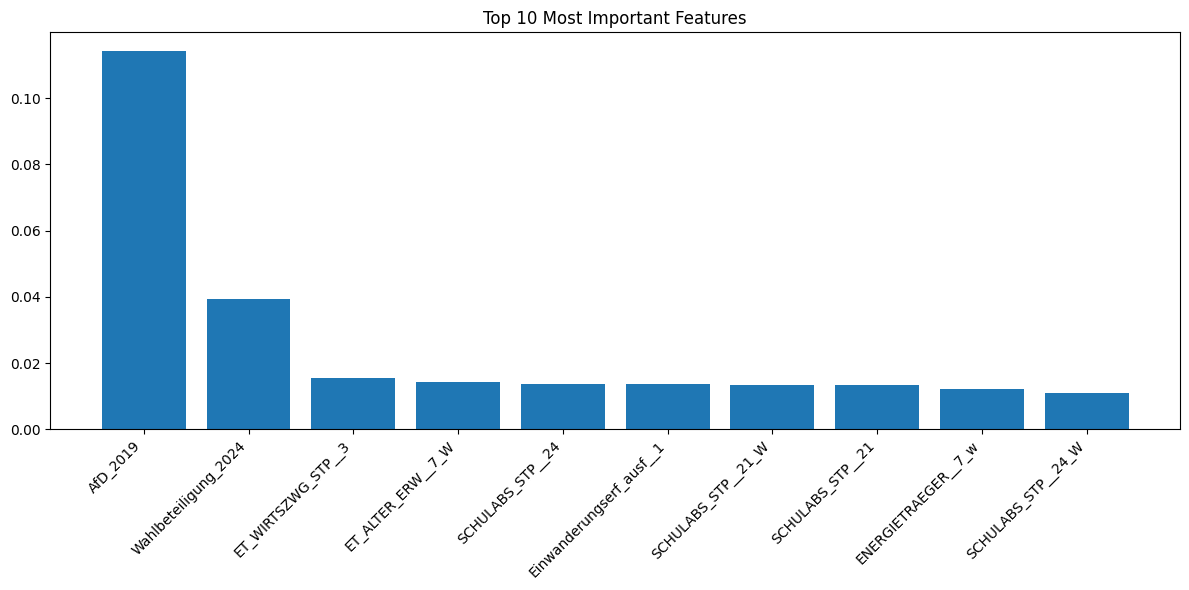


Feature importance percentages:
AfD_2019: 11.42%
Wahlbeteiligung_2024: 3.92%
ET_WIRTSZWG_STP__3: 1.56%
ET_ALTER_ERW__7_W: 1.44%
SCHULABS_STP__24: 1.36%
Einwanderungserf_ausf__1: 1.35%
SCHULABS_STP__21_W: 1.33%
SCHULABS_STP__21: 1.32%
ENERGIETRAEGER__7_w: 1.21%
SCHULABS_STP__24_W: 1.09%


In [ ]:
# Random-Forest for AfD
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Replace '–' with NaN and drop 'ET_BERUFSKLSS_HGISCO_STP__0_W' column
data = Osten_all_data
data = data.drop(columns=['ET_BERUFSKLSS_HGISCO_STP__0_W'])
data = data.replace('–', np.nan)

# Step 2: Define the independent (X) and dependent (y) variables
columns_to_exclude = ['Ortname', 'AGS', 'Personen', 'Fläche in qkm', 'AfD_2']

# X: Select only numeric columns and exclude the specified columns (including votes)
X = data.drop(columns=columns_to_exclude).select_dtypes(include=['float64', 'int64'])

# y: Target column for the party you're interested in (AfD_2)
y = data['AfD_2']

# Classify the votes into 'low', 'medium', 'high' using percentiles (terciles)
y = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

# Step 3: Drop rows where y contains NaN
X = X[y.notna()]
y = y[y.notna()]

# Step 4: Handle missing values in X by using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 6: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Step 7: Train a RandomForestClassifier with optimized parameters
model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=5,           # maximum depth of each tree
    min_samples_split=5,   # minimum samples required to split
    min_samples_leaf=2,    # minimum samples required at leaf
    random_state=42
)
model.fit(X_train, y_train)

# Step 8: Extract feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Get top 10 features (showing more for better insight)
top_features = feature_df.head(10)

# Output the top features
print("Top 10 features describing voters of a certain party:")
print(top_features)

# Calculate and print model accuracy
accuracy = model.score(X_test, y_test)
print(f"\nModel accuracy on test set: {accuracy:.2f}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'][:10], top_features['Importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

# Optional: Print feature importance percentages
print("\nFeature importance percentages:")
for idx, row in top_features.head(10).iterrows():
    print(f"{row['Feature']}: {row['Importance']*100:.2f}%")

In [ ]:
# Random-Forest for AfD

# Step 1: Replace '–' with NaN and drop 'ET_BERUFSKLSS_HGISCO_STP__0_W' column
data = sachsen_full
data = data.drop(columns=['ET_BERUFSKLSS_HGISCO_STP__0_W'])
data = data.replace('–', np.nan)

# Step 2: Define the independent (X) and dependent (y) variables
columns_to_exclude = ['Ortname', 'AGS', 'Personen', 'Fläche in qkm', 'AfD_2']  # Add 'AfD_2' to exclude it from predictors

# X: Select only numeric columns and exclude the specified columns (including votes)
X = data.drop(columns=columns_to_exclude).select_dtypes(include=['float64', 'int64'])

# y: Target column for the party you're interested in (AfD_2)
y = data['AfD_2']  # Adjust this based on your target column

# Classify the votes into 'low', 'medium', 'high' using percentiles (terciles)
y = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

# Step 3: Drop rows where y contains NaN
X = X[y.notna()]
y = y[y.notna()]

# Step 4: Handle missing values in X by using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for missing values
X_imputed = imputer.fit_transform(X)

# Step 5: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 6: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Step 7: Train a RandomForestClassifier to extract important features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Extract the three most important features
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance and get the top 3
top_features = feature_df.sort_values(by='Importance', ascending=False).head(3)

# Output the top 3 most important features
print("Top 3 features describing voters of a certain party:")
print(top_features)

# Optional: Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")


Top 3 features describing voters of a certain party:
                 Feature  Importance
5               AfD_2019    0.060659
21  Wahlbeteiligung_2019    0.020631
22  Wahlbeteiligung_2024    0.018167
Model accuracy on test set: 0.53


In [ ]:
# XGBoost (Gradient Boosting class algorithm that can handle missing values)

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Encode the target variable 'y' into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'high', 'low', 'medium' to numeric values

# Step 2: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

# Step 3: Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 4: Train the model
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 6: Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost model accuracy: {accuracy:.2f}")

# Step 7: Extract feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame with named columns

# Create a DataFrame to hold feature names and their importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance and get the top 3
top_features = feature_df.sort_values(by='Importance', ascending=False).head(3)
print("Top 3 most important features:")
print(top_features)


XGBoost model accuracy: 0.68
Top 3 most important features:
               Feature  Importance
5             AfD_2019    0.036653
169     RAUMANZAHL__07    0.030612
213  SCHULABS_STP__2_M    0.028606


In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- AfD_2019 <= 0.30
|   |--- AfD_2019 <= -0.78
|   |   |--- HH_SIZE_NAT__5 <= -1.43
|   |   |   |--- HH_SIZE_NAT__4 <= -1.99
|   |   |   |   |--- class: low
|   |   |   |--- HH_SIZE_NAT__4 >  -1.99
|   |   |   |   |--- class: medium
|   |   |--- HH_SIZE_NAT__5 >  -1.43
|   |   |   |--- ENERGIETRAEGER__2_y <= 1.77
|   |   |   |   |--- BSW_2 <= 2.14
|   |   |   |   |   |--- GRÜNE_2019 <= -1.29
|   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |--- GRÜNE_2019 >  -1.29
|   |   |   |   |   |   |--- NERGIETRAEGER__8 <= -0.60
|   |   |   |   |   |   |   |--- GEBTYPBAUWEISE__1 <= 0.21
|   |   |   |   |   |   |   |   |--- class: low
|   |   |   |   |   |   |   |--- GEBTYPBAUWEISE__1 >  0.21
|   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |--- NERGIETRAEGER__8 >  -0.60
|   |   |   |   |   |   |   |--- ZAHLWOHNGN_HHG__5_x <= -1.49
|   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |   |--- ZAHLWOHNGN_HHG__5_x >  -1.49
|   |   |   |

Now for Thueringen

In [ ]:
# Random Forest
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Step 1: Replace '–' with NaN
data = thueringen_merged
data = data.replace('–', np.nan)

# Step 2: Define the independent (X) and dependent (y) variables
columns_to_exclude = ['Ortname', 'AGS', 'Wahlkreisnummer', 'Wahlberechtigte', 'Wahlbeteiligung', 'Wähler', 'AfD_2']  # Add any additional columns here

# X: Select only numeric columns and exclude the specified columns
X = data.drop(columns=columns_to_exclude).select_dtypes(include=['float64', 'int64'])

# y: Target column for the party you're interested in (AfD_2)
y = data['AfD_2']  # Adjust this based on your target column

# Classify the votes into 'low', 'medium', 'high' using percentiles (terciles)
y = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

# Step 3: Drop rows where y contains NaN
X = X[y.notna()]
y = y[y.notna()]

# Step 4: Handle missing values in X by using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for missing values
X_imputed = imputer.fit_transform(X)

# Step 5: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 6: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Step 7: Train a RandomForestClassifier to extract important features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Extract the three most important features
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance and get the top 3
top_features = feature_df.sort_values(by='Importance', ascending=False).head(3)

# Output the top 3 most important features
print("Top 3 features describing voters of a certain party:")
print(top_features)

# Optional: Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")


Top 3 features describing voters of a certain party:
                   Feature  Importance
135            NUTZUNG__01    0.048215
92     GEBAEUDEART_SYS_1_y    0.043286
47   GEBAEUDEART_SYS_111_x    0.040587
Model accuracy on test set: 0.91


In [ ]:
# split municipal association values evenly across municipal missing values
import numpy as np


# Ensure the index is reset to avoid index-related errors
schulform_data.reset_index(drop=True, inplace=True)

# Function to distribute association values to municipalities with missing values, for all numeric columns
def distribute_association_values_all_columns(df, type_col='Regionalebene'):
    # Get all numeric columns to apply the logic to
    value_columns = df.select_dtypes(include=[np.number]).columns

    # Loop through each value column and apply the same logic
    for value_col in value_columns:
        current_association_value = None
        municipality_count = 0
        municipality_indexes = []

        # Loop through the DataFrame rows
        for i in range(len(df)):
            # If we encounter a municipal association, process the previous group
            if df.iloc[i][type_col] == 'Gemeindeverband':
                # If there are municipalities and a current association value, distribute the value
                if municipality_count > 0 and current_association_value is not None:
                    # Divide association value across the missing value municipalities
                    distributed_value = current_association_value / municipality_count
                    for idx in municipality_indexes:
                        df.at[idx, value_col] = distributed_value

                # Set the new association value
                current_association_value = df.iloc[i][value_col]
                municipality_count = 0
                municipality_indexes = []

            # If the current row is a municipality and its value is missing
            elif df.iloc[i][type_col] == 'Gemeinde' and pd.isna(df.iloc[i][value_col]):
                municipality_count += 1
                municipality_indexes.append(i)

            # If the current row is a municipality with its own value, leave it unchanged
            elif df.iloc[i][type_col] == 'Gemeinde' and not pd.isna(df.iloc[i][value_col]):
                continue

        # Distribute the value for the last group (if applicable)
        if municipality_count > 0 and current_association_value is not None:
            distributed_value = current_association_value / municipality_count
            for idx in municipality_indexes:
                df.at[idx, value_col] = distributed_value

    return df



<ipython-input-12-cfdbeb69fdcb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return data.rename(columns={'_RS': 'AGS'}, inplace=True)


In [ ]:
# Merge the datasets on the common column "_RS" and "AGS" as they represent specific ID, then compare the names of the regions

thueringenfile = pd.merge(thueringen_demografie, thueringenfile, on="AGS", how="outer",suffixes=('_df1', '_df2'))
sachsenfile = pd.merge(sachsen_demografie, sachsenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))
thueringenfile = pd.merge(thueringen_gebaeude, thueringenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))
sachsenfile = pd.merge(sachsen_gebaeude, sachsenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))
thueringenfile = pd.merge(thueringen_wohnungen, thueringenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))
sachsenfile = pd.merge(sachsen_wohnungen, sachsenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))
thueringenfile = pd.merge(thueringen_haushalte, thueringenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))
sachsenfile = pd.merge(sachsen_haushalte, sachsenfile, on="AGS", how="outer", suffixes=('_df1', '_df2'))

MergeError: Passing 'suffixes' which cause duplicate columns {'Name_y', 'Berichtszeitpunkt_y'} is not allowed.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np


data = thueringenfile
data = data.replace('–', np.nan)
# Step 2: Define the independent (X) and dependent (y) variables  # All columns except the target columns (the absolut votes)
columns_to_exclude = ['Ortname', 'AGS', 'Wahlkreisnummer','Wahlberechtigte','Wahlbeteiligung','Wähler']  # Add any additional columns here
X = data.drop(columns=columns_to_exclude)
y = data['AfD_2']  # Target column for the party you're interested in

#Step 3: delete missing values in "Ortname"
data_cleaned = data.dropna(subset=['Ortname'])
# Handle missing values by using SimpleImputer)
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for missing values
X_imputed = imputer.fit_transform(X)

# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 5: Train-test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Step 6: Train a RandomForestClassifier to extract important features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Extract the three most important features
feature_importances = model.feature_importances_
feature_names = data.drop(columns=['AfD_1']).columns

# Create a DataFrame to hold feature names and importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance and get the top 3
top_features = feature_df.sort_values(by='Importance', ascending=False).head(3)

# Output the top 3 most important features
print("Top 3 features describing voters of a certain party:")
print(top_features)

# Optional: Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '-'

In [ ]:
# Helper function to rename '_RS' to 'AGS'
def rename_column_RS_to_AGS(data):
    return data.rename(columns={'_RS': 'AGS'}, inplace=True)

# Apply filtering and renaming to each DataFrame
thueringen_demografie = filter_by_gemeinde(thueringen_demografie, 'Regionalebene')
sachsen_demografie = filter_by_gemeinde(sachsen_demografie, 'Regionalebene')
thueringen_gebaeude = filter_by_gemeinde(thueringen_gebaeude, 'Regionalebene')
sachsen_gebaeude = filter_by_gemeinde(sachsen_gebaeude, 'Regionalebene')
thueringen_wohnungen = filter_by_gemeinde(thueringen_wohnungen, 'Regionalebene')
sachsen_wohnungen = filter_by_gemeinde(sachsen_wohnungen, 'Regionalebene')
thueringen_haushalte = filter_by_gemeinde(thueringen_haushalte, 'Reg_Ebene')
sachsen_haushalte = filter_by_gemeinde(sachsen_haushalte, 'Reg_Ebene')

# Apply renaming to each DataFrame
dfs = [thueringen_demografie, sachsen_demografie, thueringen_gebaeude, sachsen_gebaeude,
       thueringen_wohnungen, sachsen_wohnungen, thueringen_haushalte, sachsen_haushalte]

for df in dfs:
    rename_column_RS_to_AGS(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import Allbus data

data = pd.read_stata("/content/drive/My Drive/Ost_Wahlen/allbus_data.dta", convert_categoricals=False)
data.to_csv('allbus_data.csv')



In [ ]:
data

,za_nr,doi,version,respid,substudy,mode,splt21,eastwest,german,ep01,ep03,ep04,ep06,lm01,lm02,lm19,lm20,lm21,lm22,lm14,xr19,xr20,lm27,lm28,lm29,lm30,lm31,lm32,lm33,lm34,lm35,lm36,lm37,lm38,lm39,la01,id02,id01,mi05,mi06,mi07,mi08,mi09,mi10,mi11,sex,mborn,yborn,age,agec,...,pn16,pn17,mp16,mp17,mp18,mp19,hp01,hp02,hp03,hp04,hp05,hp06,hp07,hp08,sm01,sm02,sm03,pv01,ls01,xs01,xs02,xs03,xs04,xs05,xs06,xs14,xs11,xt01,xt02,xt03,xt04,xt05,xt06,xt12,xt13,xt14,xt07,xt08,xt09,xt10,xt10c,xs15,xs16,land,bik,gkpol,wghtpew,wghtht,wghthew,wghthtew
0,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),1,1,4,2,1,1,3,3,3,4,2.0,210,1,2.0,1,0.5,1.0,1,1,1,0,0,1,0,0,0,0,2.0,1,2,2,3,3,2,3,1,1,2,1,1,1,1,2,10,1966,54,3,...,2,2,3,3,4,4,-11,-11,-11,-11,-11,-11,-11,-11,2,2,2,3,8,1,0,0,0,0,-10,1,22,18,6,20210618,14,25,14.25,18,6,20210618,15,0,15.00,35,1,1,2,80,3,3,1.247175,1.685751,1.235898,2.083416
1,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),2,1,4,1,1,1,3,1,3,3,5.0,90,1,5.0,2,-10.0,0.5,1,1,1,1,1,1,0,0,0,0,0.0,1,2,1,4,4,4,3,2,1,2,2,2,2,2,1,3,1968,53,3,...,1,1,-11,-11,-11,-11,2,1,1,1,1,1,1,3,2,2,2,1,10,1,0,0,0,0,-10,1,81,13,6,20210613,15,50,15.50,13,6,20210613,17,4,17.04,74,3,1,1,50,3,3,1.247175,1.685751,1.235898,2.083416
2,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),3,1,4,1,1,1,3,1,2,3,6.0,135,1,5.0,2,-10.0,6.0,1,3,0,1,0,0,0,0,0,0,0.5,2,2,2,3,4,4,3,3,2,3,1,1,2,2,2,9,1931,89,5,...,2,4,-11,-11,-11,-11,1,1,2,1,2,2,2,2,2,2,2,1,9,1,0,0,0,0,-10,1,121,11,6,20210611,14,15,14.15,11,6,20210611,15,30,15.30,75,4,1,1,10,4,3,1.247175,1.685751,1.235898,2.083416
3,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),4,1,4,2,2,1,2,1,1,1,7.0,60,1,7.0,2,-10.0,6.0,2,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10.0,2,-8,2,-8,1,3,1,1,2,2,2,2,2,2,1,11,1941,79,5,...,2,2,3,3,4,4,-11,-11,-11,-11,-11,-11,-11,-11,1,-10,2,6,9,1,0,0,0,0,-10,1,101,10,6,20210610,9,55,9.55,10,6,20210610,23,10,23.10,795,5,1,1,160,2,2,0.506620,0.801962,0.529570,0.424695
4,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),5,1,4,2,1,1,3,3,3,-8,7.0,180,1,7.0,1,3.0,0.5,1,2,0,1,0,1,0,0,0,0,3.0,2,2,-8,-8,2,3,2,1,2,2,2,2,2,2,2,2,1959,62,4,...,2,3,2,2,2,3,-11,-11,-11,-11,-11,-11,-11,-11,2,2,2,-8,8,1,0,0,0,0,-10,2,59,13,6,20210613,13,30,13.30,13,6,20210613,14,35,14.35,65,3,1,1,50,7,3,1.247175,0.561917,1.235898,0.694472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),5338,1,4,1,1,1,3,2,4,3,6.0,270,1,6.0,1,0.5,7.0,1,2,1,0,0,1,0,0,0,0,0.5,1,2,1,3,2,2,3,2,1,2,2,1,2,1,1,11,1962,58,3,...,2,2,-11,-11,-11,-11,3,2,3,2,2,2,2,2,2,2,2,4,10,1,0,0,0,0,-10,1,44,11,6,20210611,7,30,7.30,11,6,20210611,8,15,8.15,45,2,1,1,30,9,3,1.247175,0.842875,1.235898,1.041708
5338,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),5339,1,4,1,2,1,2,2,4,2,7.0,150,2,-10.0,1,7.0,0.0,1,3,1,1,1,1,0,0,0,0,7.0,4,2,4,2,3,2,3,2,3,2,1,1,1,2,2,10,1987,33,2,...,2,2,-11,-11,-11,-11,4,3,3,4,2,2,4,1,2,2,2,42,9,1,0,0,0,0,-10,2,73,9,6,20210609,13,6,13.06,9,6,20210609,14,21,14.21,75,4,1,1,160,-34,5,0.506620,0.801962,0.529570,0.424695
5339,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),5340,1,4,1,1,1,3,2,2,2,3.0,120,1,3.0,2,-10.0,0.5,2,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10.0,1,1,2,-9,2,3,3,1,1,2,1,1,2,2,2,8,1967,53,3,...,1,3,-11,-11,-11,-11,3,2,4,2,1,1,2,2,2,2,2,4,7,1,0,0,0,0,-10,1,38,9,6,20210609,20,15,20.15,9,6,20210609,21,50,21.50,95,4,1,1,90,10,7,1.247175,1.685751,1.235898,2.083416
5340,5280,https://doi.org/10.4232/1.14238,2.0.1 (2023-12-13),5341,2,3,3,2,1,-11,-11,-11,-11,7.0,150,1,7.0,2,-10.0,6.0,-15,1,1,1,0,1,1,0,0,0,0.0,2,2,1,-9,2,3,2,2,2,2,2,2,2,2,1,10,1952,68,4,...,2,3,1,2,3,3,3,2,2,2,2,1,2,2,2,1,2,3,

In [ ]:
prices = [
    185, 162, 158, 149, 147, 190, 183, 150, 156, 149,
    101, 117, 117, 64, 114, 100, 128, 126, 140, 130,
    115, 108, 100, 66, 92, 109, 121, 80
]

import numpy as np

median_price = np.median(prices)

median_price

123.5

In [ ]:
# A1
#FILLING MISSING VALUES IN DATA VON EDUCATION AND OCCUPATION
# replacing all missing values with share at the urban/land distric level

import pandas as pd
import numpy as np

# Filter by relavant RS, which is 14 for Sachsen
sachsen_alter = filter_by_RS_prefix(alter_data, '14')

# how much of the data is missing?
sachsen_alter = sachsen_alter.replace("/", np.nan)

sachsen_alter['_RS'] = sachsen_alter['_RS'].astype(str)

#  2 tables, one for the landkreis values, one for the Gemeinde values
sachsen_alter_Landkreis = sachsen_alter[sachsen_alter['_RS'].str.len() == 5]  # Filter rows with 5-digit IDs
sachsen_alter_Gemeinde = filter_by_gemeinde(sachsen_alter, 'Regionalebene')

# calculate the share and replace total numbers with that value

# columns to exclude from the share calculation (e.g., ID columns, region names)
columns_to_exclude = ['_RS', 'Name', 'Berichtszeitpunkt', 'Regionalebene', 'ET_ALTER_ERW']

# columns to calculate shares for
columns_to_calculate = [col for col in sachsen_alter_Landkreis.columns if col not in columns_to_exclude]

#  Convert the columns to numeric before dividing
for col in columns_to_calculate:
     sachsen_alter_Landkreis[col] = pd.to_numeric(sachsen_alter_Landkreis[col], errors='coerce')  # Convert to numeric

# for col in columns_to_calculate:
#      sachsen_alter_Gemeinde[col] = pd.to_numeric(sachsen_alter_Gemeinde[col], errors='coerce')  # Convert to numeric

#  Loop through each relevant column and replace values with the share
for col in columns_to_calculate:
     sachsen_alter_Landkreis[col] = sachsen_alter_Landkreis[col] / sachsen_alter_Landkreis['ET_ALTER_ERW']

# Create a column for the first 5 digits in the municipal-level data to match with district-level data
sachsen_alter_Gemeinde['_RS'] = sachsen_alter_Gemeinde['_RS'].astype(str)
sachsen_alter_Gemeinde['Landkreis_ID'] = sachsen_alter_Gemeinde['_RS'].str[:5]

# calculate shares for the Gemeinde data that is not NaN
for col in columns_to_calculate:
     sachsen_alter_Gemeinde[col] = sachsen_alter_Gemeinde[col] / sachsen_alter_Gemeinde['ET_ALTER_ERW']

# Merge based on  "Landkreis_ID"
sachsen_alter_filled = pd.merge(sachsen_alter_Gemeinde, sachsen_alter_Landkreis,
                       left_on='Landkreis_ID', right_on='_RS', suffixes=('', '_Landkreis'))

# Loop through each column to fill NaNs with corresponding Landkreis values
for col in sachsen_alter_Gemeinde.columns:
    if col not in ['_RS', 'Landkreis_ID']:  # Skip ID columns
        sachsen_alter_filled[col] = sachsen_alter_filled[col].fillna(sachsen_alter_filled[col + '_Landkreis'])

# Drop unnecessary columns
sachsen_alter_filled = sachsen_alter_filled.drop(columns=[col for col in sachsen_alter_filled.columns if '_Landkreis' in col or col == 'Landkreis_ID'])

# merged_data
sachsen_alter_filled


<ipython-input-17-b06f9502b162>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sachsen_alter = sachsen_alter.replace("/", np.nan)
<ipython-input-17-b06f9502b162>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sachsen_alter_Landkreis[col] = pd.to_numeric(sachsen_alter_Landkreis[col], errors='coerce')  # Convert to numeric
<ipython-input-17-b06f9502b162>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Berichtszeitpunkt,_RS,Name,Regionalebene,ET_ALTER_ERW,ET_ALTER_ERW__M,ET_ALTER_ERW__W,ET_ALTER_ERW__1,ET_ALTER_ERW__1_M,ET_ALTER_ERW__1_W,ET_ALTER_ERW__2,ET_ALTER_ERW__2_M,ET_ALTER_ERW__2_W,ET_ALTER_ERW__3,ET_ALTER_ERW__3_M,ET_ALTER_ERW__3_W,ET_ALTER_ERW__4,ET_ALTER_ERW__4_M,ET_ALTER_ERW__4_W,ET_ALTER_ERW__5,ET_ALTER_ERW__5_M,ET_ALTER_ERW__5_W,ET_ALTER_ERW__6,ET_ALTER_ERW__6_M,ET_ALTER_ERW__6_W,ET_ALTER_ERW__7,ET_ALTER_ERW__7_M,ET_ALTER_ERW__7_W
0,20220515,145110000000,"Chemnitz, Stadt",Gemeinde,101200.0,0.535870,0.464130,0.025692,0.013538,0.012055,0.142095,0.076976,0.065119,0.246344,0.136561,0.109783,0.204447,0.111759,0.092688,0.247925,0.130534,0.117391,0.109387,0.051877,0.057411,0.024308,0.014625,0.009684
1,20220515,145210010010,Amtsberg,Gemeinde,147330.0,0.527727,0.472273,0.030001,0.016765,0.013168,0.101541,0.055318,0.046223,0.192086,0.100998,0.091156,0.235118,0.125229,0.109889,0.275504,0.141791,0.133713,0.136564,0.070250,0.066314,0.029118,0.017308,0.011810
2,20220515,145210020020,"Annaberg-Buchholz, Stadt",Gemeinde,7750.0,0.523871,0.476129,0.032258,0.016765,0.013168,0.121290,0.068387,0.052903,0.184516,0.095484,0.087742,0.223226,0.121290,0.101935,0.270968,0.135484,0.135484,0.138065,0.072258,0.065806,0.030968,0.017308,0.011810
3,20220515,145210035035,"Aue-Bad Schlema, Stadt",Gemeinde,8100.0,0.516049,0.483951,0.035802,0.016765,0.013168,0.116049,0.067901,0.048148,0.193827,0.092593,0.101235,0.222222,0.124691,0.096296,0.277778,0.132099,0.145679,0.138272,0.080247,0.058025,0.029118,0.017308,0.011810
4,20220515,145210110110,Breitenbrunn/Erzgeb.,Gemeinde,147330.0,0.527727,0.472273,0.030001,0.016765,0.013168,0.101541,0.055318,0.046223,0.192086,0.100998,0.091156,0.235118,0.125229,0.109889,0.275504,0.141791,0.133713,0.136564,0.070250,0.066314,0.029118,0.017308,0.011810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,20220515,147305306280,Schönwölkau,Gemeinde,92600.0,0.530346,0.469546,0.024946,0.015767,0.009071,0.095464,0.053996,0.041469,0.222246,0.119762,0.102592,0.216631,0.111879,0.104644,0.293629,0.152484,0.141145,0.131641,0.066955,0.064687,0.015443,0.009503,0.005940
415,20220515,147305311100,Dreiheide,Gemeinde,92600.0,0.530346,0.469546,0.024946,0.015767,0.009071,0.095464,0.053996,0.041469,0.222246,0.119762,0.102592,0.216631,0.111879,0.104644,0.293629,0.152484,0.141145,0.131641,0.066955,0.064687,0.015443,0.009503,0.005940
416,20220515,147305311310,"Torgau, Stadt",Gemeinde,8040.0,0.528607,0.471393,0.034826,0.015767,0.009071,0.106965,0.065920,0.039801,0.218905,0.129353,0.089552,0.217662,0.103234,0.113184,0.296020,0.150498,0.145522,0.119403,0.054726,0.064677,0.015443,0.009503,0.005940
417,20220515,147305601140,Jesewitz,Gemeinde,92600.0,0.530346,0.469546,0.024946,0.015767,0.009071,0.095464,0.053996,0.041469,0.222246,0.119762,0.102592,0.216631,0.111879,0.104644,0.293629,0.152484,0.141145,0.131641,0.066955,0.064687,0.015443,0.009503,0.005940
